In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import torch

# Generate synthetic data
np.random.seed(42)
num_samples = 1000

# Features: Age, Income, Investments
age = np.random.randint(18, 70, size=num_samples)
income = np.random.normal(50000, 15000, size=num_samples)  # Average income
investments = np.random.normal(10000, 5000, size=num_samples)  # Average investments

# Wealth target: a simple function of the features (you can modify this)
wealth = 0.4 * age + 0.5 * (income / 1000) + 0.3 * (investments / 1000) + np.random.normal(0, 5, size=num_samples)

# Convert to PyTorch tensors
X = torch.tensor(np.column_stack((age, income, investments)), dtype=torch.float32)
y = torch.tensor(wealth, dtype=torch.float32).view(-1, 1)

In [3]:
import torch.nn as nn
import torch.optim as optim

class WealthModel(nn.Module):
    def __init__(self):
        super(WealthModel, self).__init__()
        self.fc1 = nn.Linear(3, 64)  # 3 input features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)   # Output is a single value (wealth)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation function on output layer for regression
        return x

model = WealthModel()

# Training settings
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 294497.3750
Epoch [20/100], Loss: 571417.5625
Epoch [30/100], Loss: 220461.0781
Epoch [40/100], Loss: 25549.3848
Epoch [50/100], Loss: 51257.9766
Epoch [60/100], Loss: 10446.5537
Epoch [70/100], Loss: 5168.5269
Epoch [80/100], Loss: 4774.7935
Epoch [90/100], Loss: 2528.6311
Epoch [100/100], Loss: 1536.6464


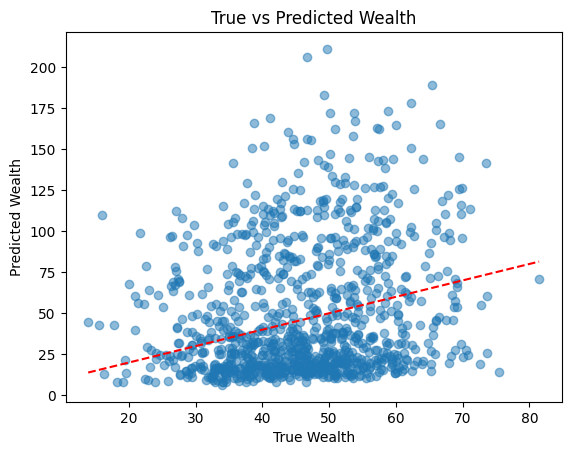

In [4]:
model.eval()
with torch.no_grad():
    predicted = model(X)

# Optionally, you can visualize or calculate performance metrics
import matplotlib.pyplot as plt

plt.scatter(y.numpy(), predicted.numpy(), alpha=0.5)
plt.xlabel('True Wealth')
plt.ylabel('Predicted Wealth')
plt.title('True vs Predicted Wealth')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.show()


In [5]:
class ObfuscationLayer(nn.Module):
    def __init__(self):
        super(ObfuscationLayer, self).__init__()

    def forward(self, x):
        # Add noise to simulate obfuscation/encryption
        noise = torch.normal(0, 0.1, x.size()).to(x.device)  # Adjust the standard deviation for noise level
        return x + noise

In [6]:
class EnhancedWealthModel(nn.Module):
    def __init__(self):
        super(EnhancedWealthModel, self).__init__()
        self.obfuscation = ObfuscationLayer()
        self.fc1 = nn.Linear(3, 128)  # More units for complexity
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)    # Output is a single value (wealth)

    def forward(self, x):
        x = self.obfuscation(x)  # Apply obfuscation
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No activation function on output layer for regression
        return x

model = EnhancedWealthModel()

In [7]:
# Training settings
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 304.5843
Epoch [20/100], Loss: 232.6855
Epoch [30/100], Loss: 644.6909
Epoch [40/100], Loss: 369.2981
Epoch [50/100], Loss: 173.4900
Epoch [60/100], Loss: 171.6672
Epoch [70/100], Loss: 196.7641
Epoch [80/100], Loss: 169.4453
Epoch [90/100], Loss: 123.6466
Epoch [100/100], Loss: 103.3941


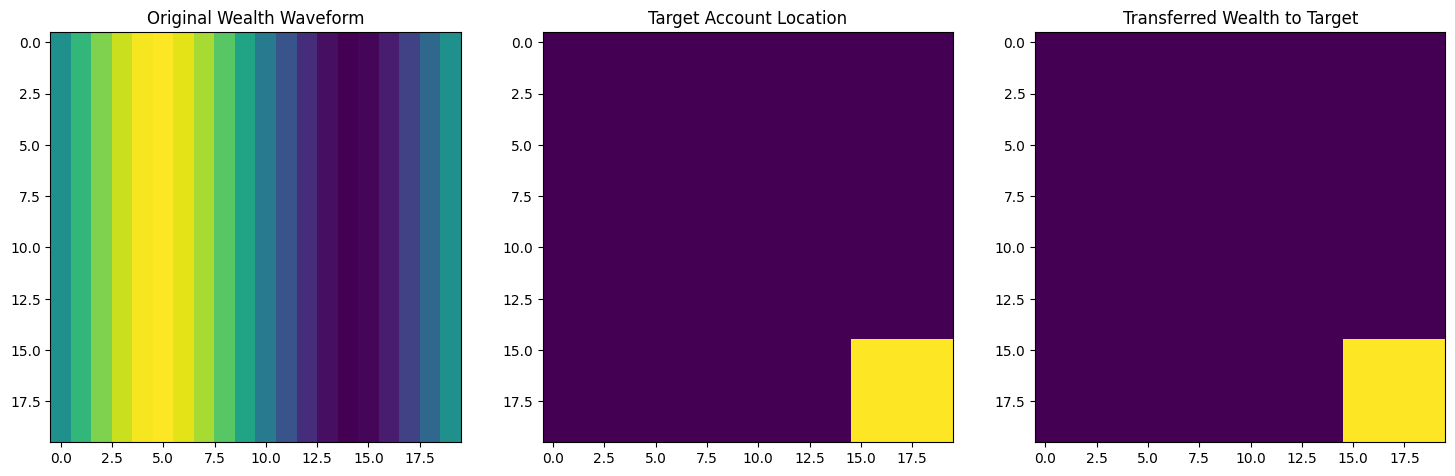

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define grid size
grid_size = 20

# Generate a sine waveform to represent wealth data
def generate_wealth_waveform(grid_size):
    x = np.linspace(0, 2 * np.pi, grid_size)
    wealth_waveform = np.sin(x)
    return wealth_waveform

# Create wealth data for the grid
wealth_waveform = generate_wealth_waveform(grid_size)
wealth_data = np.tile(wealth_waveform, (grid_size, 1))  # Repeat waveform along one axis

# Convert wealth data to PyTorch tensor
wealth_data = torch.tensor(wealth_data, dtype=torch.float32)

# Define a simple neural network to "transfer" wealth data to a targeted account
class WealthTransferNet(nn.Module):
    def __init__(self):
        super(WealthTransferNet, self).__init__()
        self.fc1 = nn.Linear(grid_size * grid_size, 128)
        self.fc2 = nn.Linear(128, grid_size * grid_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the network, loss function, and optimizer
net = WealthTransferNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Target account: Wealth directed to bottom-right corner of the grid
target_account = torch.zeros((grid_size, grid_size))
target_account[-5:, -5:] = 1  # Simulating the transfer to a targeted account

# Convert the grid to a single vector for the neural network
input_data = wealth_data.view(-1)
target_data = target_account.view(-1)

# Training the network
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    output = net(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

# Reshape the output to the grid size
output_grid = output.detach().view(grid_size, grid_size)

# Plot the original wealth waveform and transferred wealth
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(wealth_data, cmap='viridis')
axes[0].set_title('Original Wealth Waveform')
axes[1].imshow(target_account, cmap='viridis')
axes[1].set_title('Target Account Location')
axes[2].imshow(output_grid, cmap='viridis')
axes[2].set_title('Transferred Wealth to Target')
plt.show()

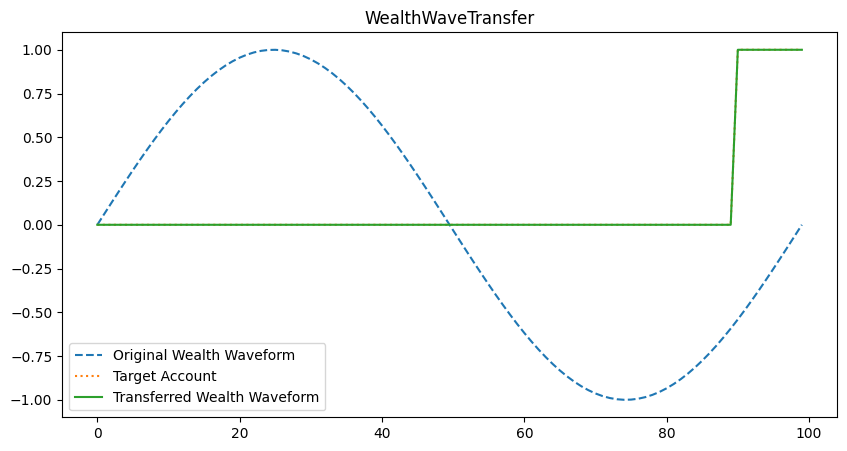

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the size of the waveform
waveform_size = 100

# Generate a sine waveform to represent wealth data
def generate_wealth_waveform(waveform_size):
    x = np.linspace(0, 2 * np.pi, waveform_size)
    wealth_waveform = np.sin(x)
    return wealth_waveform

# Create wealth data as a single waveform
wealth_waveform = generate_wealth_waveform(waveform_size)
wealth_data = torch.tensor(wealth_waveform, dtype=torch.float32)

# Define a neural network to transfer wealth data to a targeted point in the waveform
class WealthTransferNet(nn.Module):
    def __init__(self):
        super(WealthTransferNet, self).__init__()
        self.fc1 = nn.Linear(waveform_size, 64)
        self.fc2 = nn.Linear(64, waveform_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the network, loss function, and optimizer
net = WealthTransferNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Target account: Wealth directed to the end of the waveform (right side)
target_account = torch.zeros(waveform_size)
target_account[-10:] = 1  # Simulating the transfer to the last 10 positions

# Training the network
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = net(wealth_data)
    loss = criterion(output, target_account)
    loss.backward()
    optimizer.step()

# Convert output to numpy for plotting
output_waveform = output.detach().numpy()

# Plot the original and transferred wealth waveform
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(wealth_data.numpy(), label="Original Wealth Waveform", linestyle="--")
ax.plot(target_account.numpy(), label="Target Account", linestyle=":")
ax.plot(output_waveform, label="Transferred Wealth Waveform")
ax.set_title('WealthWaveTransfer')
ax.legend()
plt.show()